In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
class txtcol:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
df = pd.read_csv('IPL_PL.csv')
df = df[0:57]

columns = ['Number', 'Match Between']
names =['Dhruv','Aniket', 'Meghashyam', 'Jil', 'Keval', 'Shreyans', 'Mustafa']



for name in names:
    pred = name + ' Prediction'
    pts = name + ' Points'
    columns.append(pred)
    columns.append(pts)

pred = ['Dhruv Prediction', 'Aniket Prediction', 'Meghashyam Prediction', 'Jil Prediction', 'Keval Prediction', 'Shreyans Prediction', 'Mustafa Prediction']
points = ['Dhruv Points', 'Aniket Points', 'Meghashyam Points', 'Jil Points', 'Keval Points', 'Shreyans Points', 'Mustafa Points']


df.columns = columns
df.drop([0], inplace = True)

df.reset_index()
df = df.set_index('Number')

df2 = df.copy()
df2
df2[points] = df2[points].apply(pd.to_numeric)
df2 = df2.replace('-', 'NP')#Did Not Predict
for i in pred:
    df2[i] = df2[i].str.split('-',1).str[0]
df2 = df2.replace('0', 'NP-C1I')#Did not predict before game and changed in 1st innings 
df2

for i in columns[2:]:
    df[i] = df[i].apply(lambda x: 'Changed Prediction' if len(x) > 4 else x) 
df = df.replace('-', 'No Prediction')
df = df.replace('0-RR','No Prediction')
df = df.replace('0-MI', 'No Prediction')

df[points] = df[points].apply(pd.to_numeric)


In [4]:
corr_plot = df2[points]
corr_plot.iloc[:,:].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

,Dhruv Points,Aniket Points,Meghashyam Points,Jil Points,Keval Points,Shreyans Points,Mustafa Points
Dhruv Points,1.000,0.122,-0.066,0.203,0.070,-0.193,0.065
Aniket Points,0.122,1.000,0.018,-0.172,0.330,0.130,0.391
Meghashyam Points,-0.066,0.018,1.000,-0.258,0.261,0.213,0.025
Jil Points,0.203,-0.172,-0.258,1.000,-0.052,-0.331,-0.260
Keval Points,0.070,0.330,0.261,-0.052,1.000,0.208,0.348
Shreyans Points,-0.193,0.130,0.213,-0.331,0.208,1.000,0.104
Mustafa Points,0.065,0.391,0.025,-0.260,0.348,0.104,1.000


In [5]:
print(txtcol.BOLD + 'Total Points earned by participants:' + txtcol.END)
tot_pts = {}
for name in names:
    temp_pts = df[name + ' Points'].sum()
    tot_pts[name] = temp_pts
tot_pts = pd.DataFrame(tot_pts.items(), columns = ['Name', 'Points'])
tot_pts = tot_pts.set_index("Name")
tot_pts = tot_pts.sort_values("Points", ascending = False)
tot_pts

Total Points earned by participants:


,Points
Name,
Meghashyam,96
Aniket,85
Jil,80
Shreyans,72
Dhruv,70
Mustafa,70
Keval,68


In [6]:
tot_pred = pd.Series()
tot_pred = tot_pred.astype('int64')
for i in pred:
    temp = df2[i].value_counts()
    tot_pred = tot_pred.add(temp, fill_value=0)
tot_pred = tot_pred.sort_values(ascending=False)

<ipython-input-6-4ed60e334acb>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tot_pred = pd.Series()


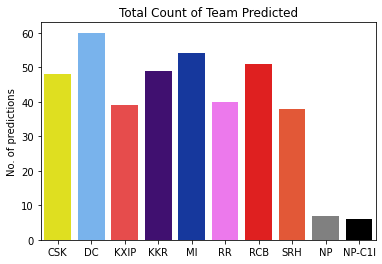

In [7]:
teams = ['CSK','DC', 'KXIP', 'KKR', 'MI', 'RR', 'RCB', 'SRH']
color = ['#FFFF00', '#66B3FF', '#FF3333', '#400080', '#002DB3', '#FF66FF', '#FF0000', '#FF471A', 'grey', 'black']
a = ['CSK','DC', 'KXIP', 'KKR', 'MI', 'RR', 'RCB', 'SRH', 'NP', 'NP-C1I']

team_color = sns.set_palette(color)
#plt.style.use('fivethirtyeight')

ax = sns.barplot(x=tot_pred.index, y = tot_pred.values, order = a, palette=sns.color_palette(color, 10))
ax.set(ylabel='No. of predictions', title = 'Total Count of Team Predicted')
plt.show()

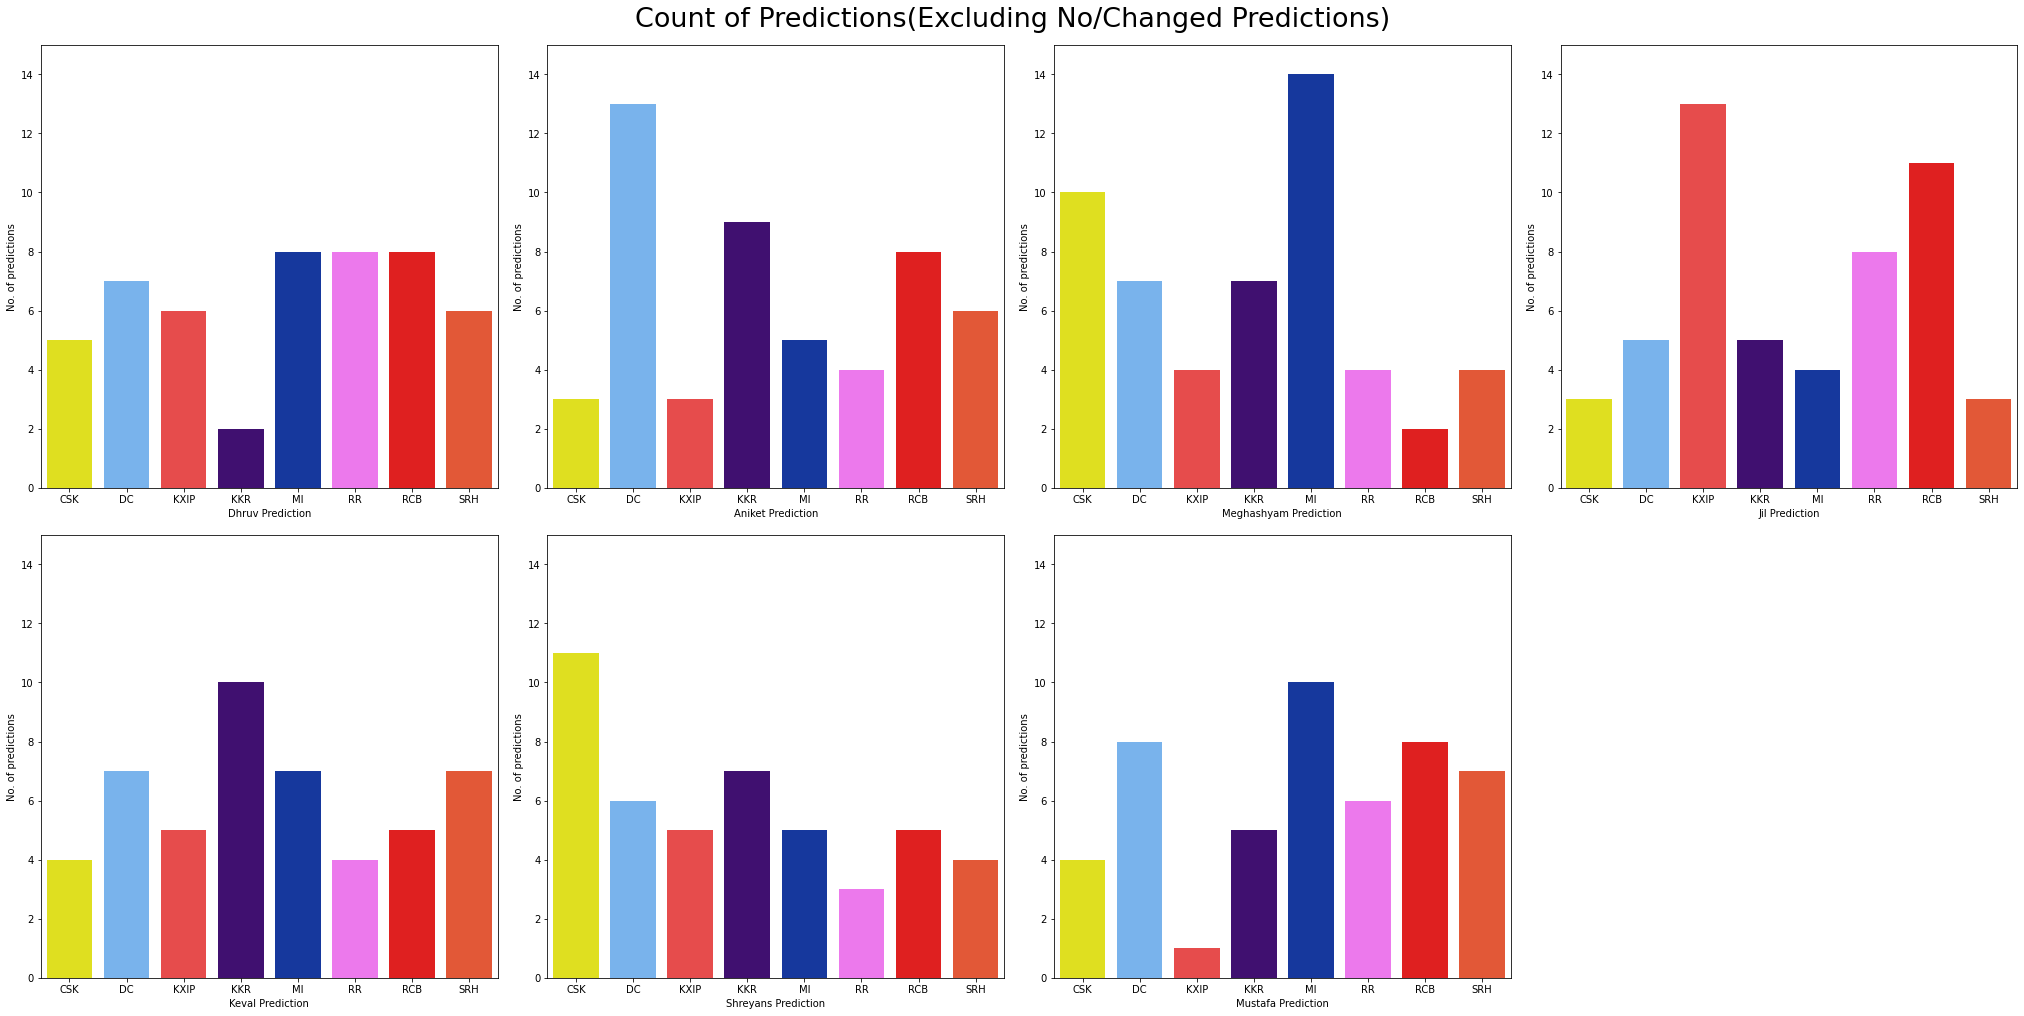

In [8]:
num_plots = len(pred)
total_cols = 4
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
plt.suptitle('Count of Predictions(Excluding No/Changed Predictions)',fontsize = 27)
fig.delaxes(axs[1][3])
for i, var in enumerate(pred):
    row = i//total_cols
    pos = i % total_cols
    ax = sns.countplot(x=var,data=df,order = teams, palette=sns.color_palette(color, 10), ax=axs[row][pos])
    ax.set(ylim=(0, 15), ylabel='No. of predictions')
plt.show()

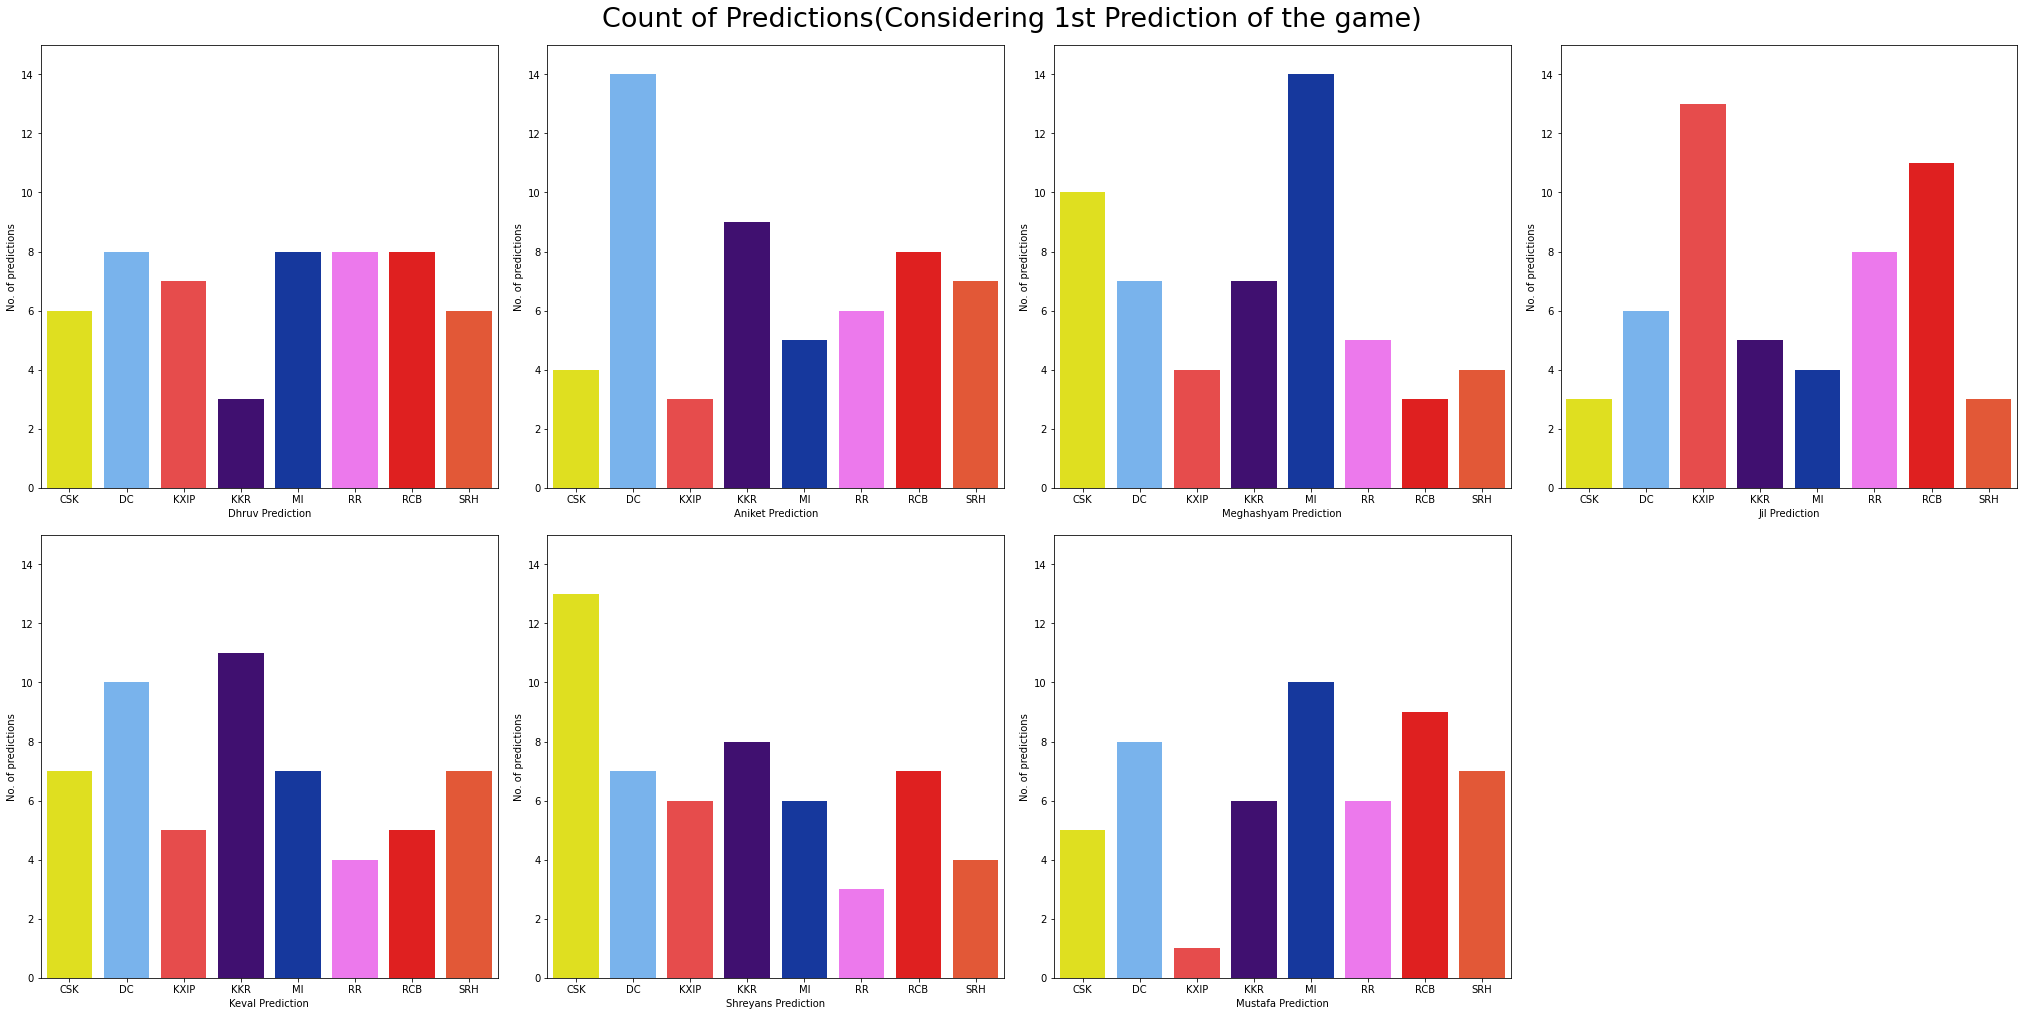

In [9]:
total_cols = 4
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
plt.suptitle('Count of Predictions(Considering 1st Prediction of the game)',fontsize = 27)
fig.delaxes(axs[1][3])
for i, var in enumerate(pred):
    row = i//total_cols
    pos = i % total_cols
    ax = sns.countplot(x=var,data=df2,order = teams, palette=sns.color_palette(color, 10), ax=axs[row][pos])
    ax.set(ylim=(0, 15), ylabel='No. of predictions')
plt.show()

In [10]:
print(txtcol.BOLD + 'If all predictions were correct of participants, then the points table of IPL would have been:\n' + txtcol.END)
for i, name in zip(pred, names):
    temp = df2[i].value_counts()
    
    if  'NP' in temp and 'NP-C1I' in temp:
        temp.drop(labels=['NP', 'NP-C1I'], inplace = True)
    elif 'NP-C1I' in temp:
        temp.drop(labels=['NP-C1I'], inplace = True)
    elif 'NP' in temp:
        temp.drop(labels=['NP'], inplace = True)
    
    temp = pd.DataFrame({'Team':temp.index, 'Points':temp.values})
    temp = temp.sort_values('Points', ascending=False)
    temp.set_index('Team', inplace = True)
    temp['Points'] = temp['Points']*2
    print(txtcol.BOLD + "If " + name + "'s Prediction were correct" + txtcol.END + '\n')
    print(temp.to_markdown())
    print('\n')

If all predictions were correct of participants, then the points table of IPL would have been:

If Dhruv's Prediction were correct

| Team   |   Points |
|:-------|---------:|
| MI     |       16 |
| RR     |       16 |
| RCB    |       16 |
| DC     |       16 |
| KXIP   |       14 |
| CSK    |       12 |
| SRH    |       12 |
| KKR    |        6 |


If Aniket's Prediction were correct

| Team   |   Points |
|:-------|---------:|
| DC     |       28 |
| KKR    |       18 |
| RCB    |       16 |
| SRH    |       14 |
| RR     |       12 |
| MI     |       10 |
| CSK    |        8 |
| KXIP   |        6 |


If Meghashyam's Prediction were correct

| Team   |   Points |
|:-------|---------:|
| MI     |       28 |
| CSK    |       20 |
| KKR    |       14 |
| DC     |       14 |
| RR     |       10 |
| KXIP   |        8 |
| SRH    |        8 |
| RCB    |        6 |


If Jil's Prediction were correct

| Team   |   Points |
|:-------|---------:|
| KXIP   |       26 |
| RCB    |       22 |
| 

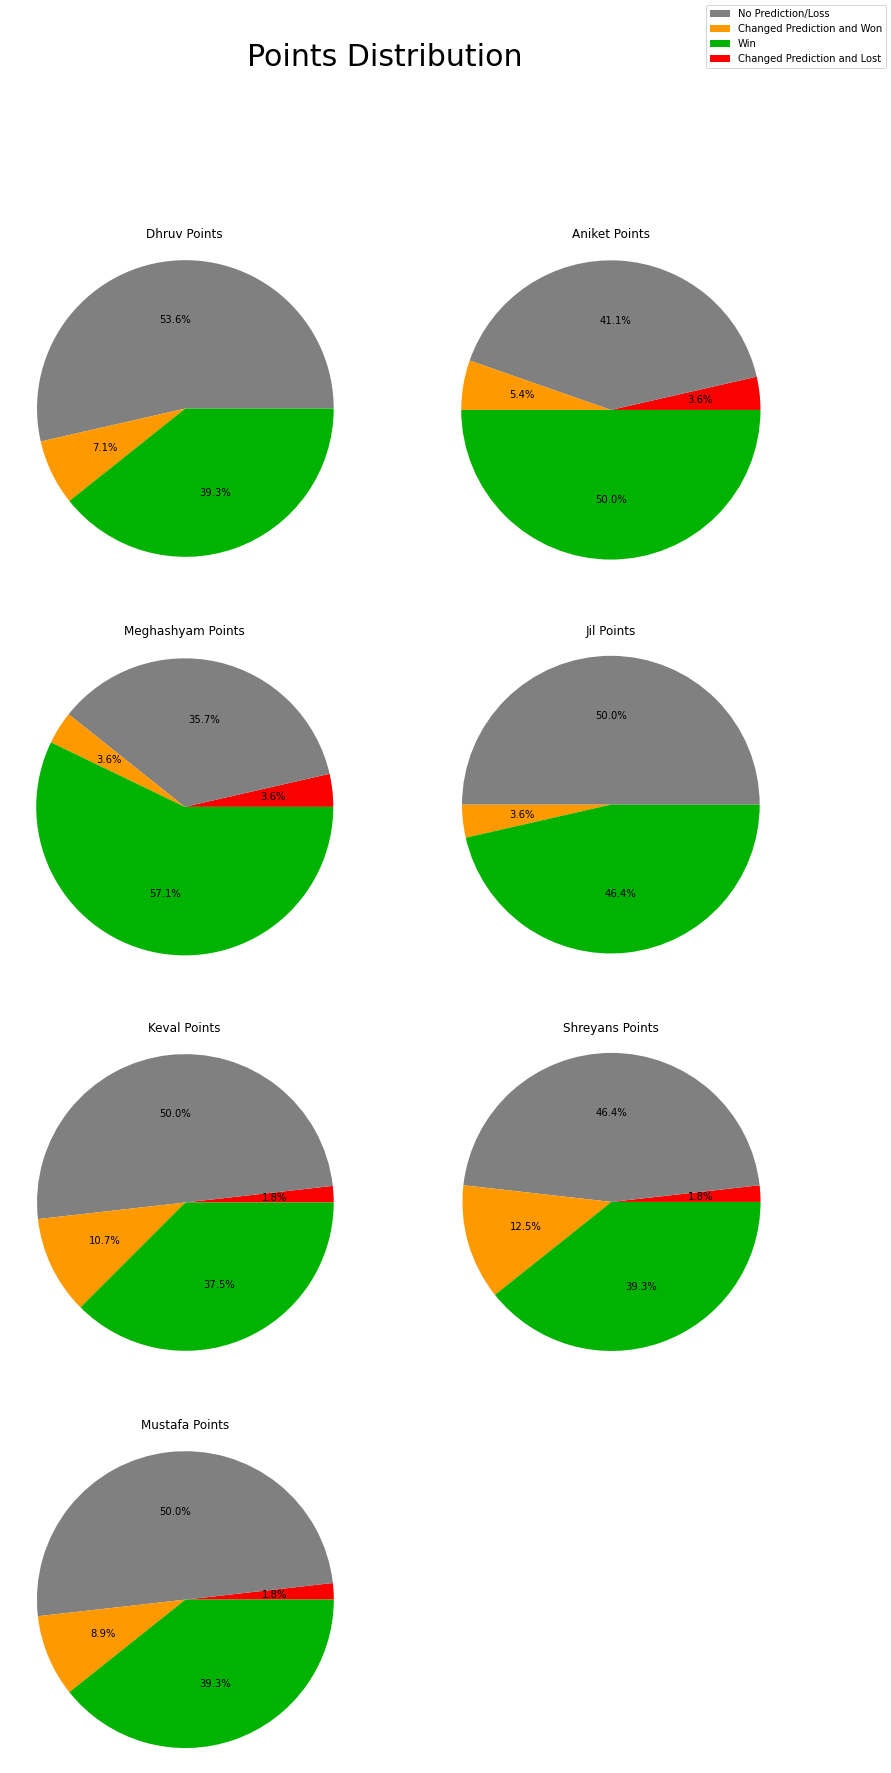

In [11]:
num_plots = len(pred)
total_cols = 2
total_rows = num_plots//total_cols + 1

fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(7*total_cols, 7*total_rows))
fig.delaxes(axs[3][1])
plt.suptitle('Points Distribution', fontsize = 30)


for a,i in enumerate(points):
    row = a//total_cols
    pos = a % total_cols
    b = df.groupby(i).size()
    if len(b) == 3:
        p_lbl = ['No Prediction/Loss', 'Changed Prediction and Won', 'Win']
        colors = ['grey', '#ff9900', '#00b300']
    else:
        p_lbl = ['Changed Prediction and Lost','No Prediction/Loss', 'Changed Prediction and Won', 'Win']
        colors = ['#FA0000','grey', '#ff9900', '#00b300']
    axs[row, pos].pie(b, autopct='%1.1f%%', radius=0.95, colors = colors)
    axs[row, pos].set(title = i)
    axs[row, pos].axis('equal')
p_lbl = ['Changed Prediction and Lost', 'Win', 'Changed Prediction and Won', 'No Prediction/Loss']
p_lbl.reverse()
fig.legend(p_lbl)

In [12]:
l2 = []
for name in names:
    temp = name + '_CPoints'
    l2.append(temp)
print(l2)
for i,j in zip(l2,names):
    df[i] = df[j + ' Points'].cumsum()
df

['Dhruv_CPoints', 'Aniket_CPoints', 'Meghashyam_CPoints', 'Jil_CPoints', 'Keval_CPoints', 'Shreyans_CPoints', 'Mustafa_CPoints']


,Match Between,Dhruv Prediction,Dhruv Points,Aniket Prediction,Aniket Points,Meghashyam Prediction,Meghashyam Points,Jil Prediction,Jil Points,Keval Prediction,...,Shreyans Points,Mustafa Prediction,Mustafa Points,Dhruv_CPoints,Aniket_CPoints,Meghashyam_CPoints,Jil_CPoints,Keval_CPoints,Shreyans_CPoints,Mustafa_CPoints
Number,,,,,,,,,,,,,,,,,,,,,
Match 1,MI VS CSK,MI,0,MI,0,MI,0,MI,0,MI,...,3,MI,0,0,0,0,0,0,3,0
Match 2,DC VS KXIP,KXIP,0,DC,3,DC,3,KXIP,0,DC,...,3,DC,3,0,3,3,0,3,6,3
Match 3,SRH VS RCB,RCB,3,RCB,3,SRH,0,RCB,3,RCB,...,3,RCB,3,3,6,3,3,6,9,6
Match 4,RR VS CSK,RR,3,CSK,0,CSK,0,RR,3,Changed Prediction,...,0,RR,3,6,6,3,6,7,9,9
Match 5,KKR VS MI,KKR,0,KKR,0,MI,3,MI,3,KKR,...,0,KKR,0,6,6,6,9,7,9,9
Match 6,KXIP VS RCB,RCB,0,RCB,0,KXIP,3,KXIP,3,RCB,...,0,RCB,0,6,6,9,12,7,9,9
Match 7,CSK VS DC,DC,3,DC,3,CSK,0,DC,3,DC,...,0,DC,3,9,9,9,15,10,9,12
Match 8,KKR VS SRH,SRH,0,Changed Prediction,1,KKR,3,KKR,3,KKR,...,3,SRH,0,9,10,12,18,13,12,12
Match 9,KXIP VS RR,KXIP,0,Changed Prediction,-1,Changed Prediction,-1,KXIP,0,KXIP,...,0,Changed Prediction,-1,9,9,11,18,13,12,11


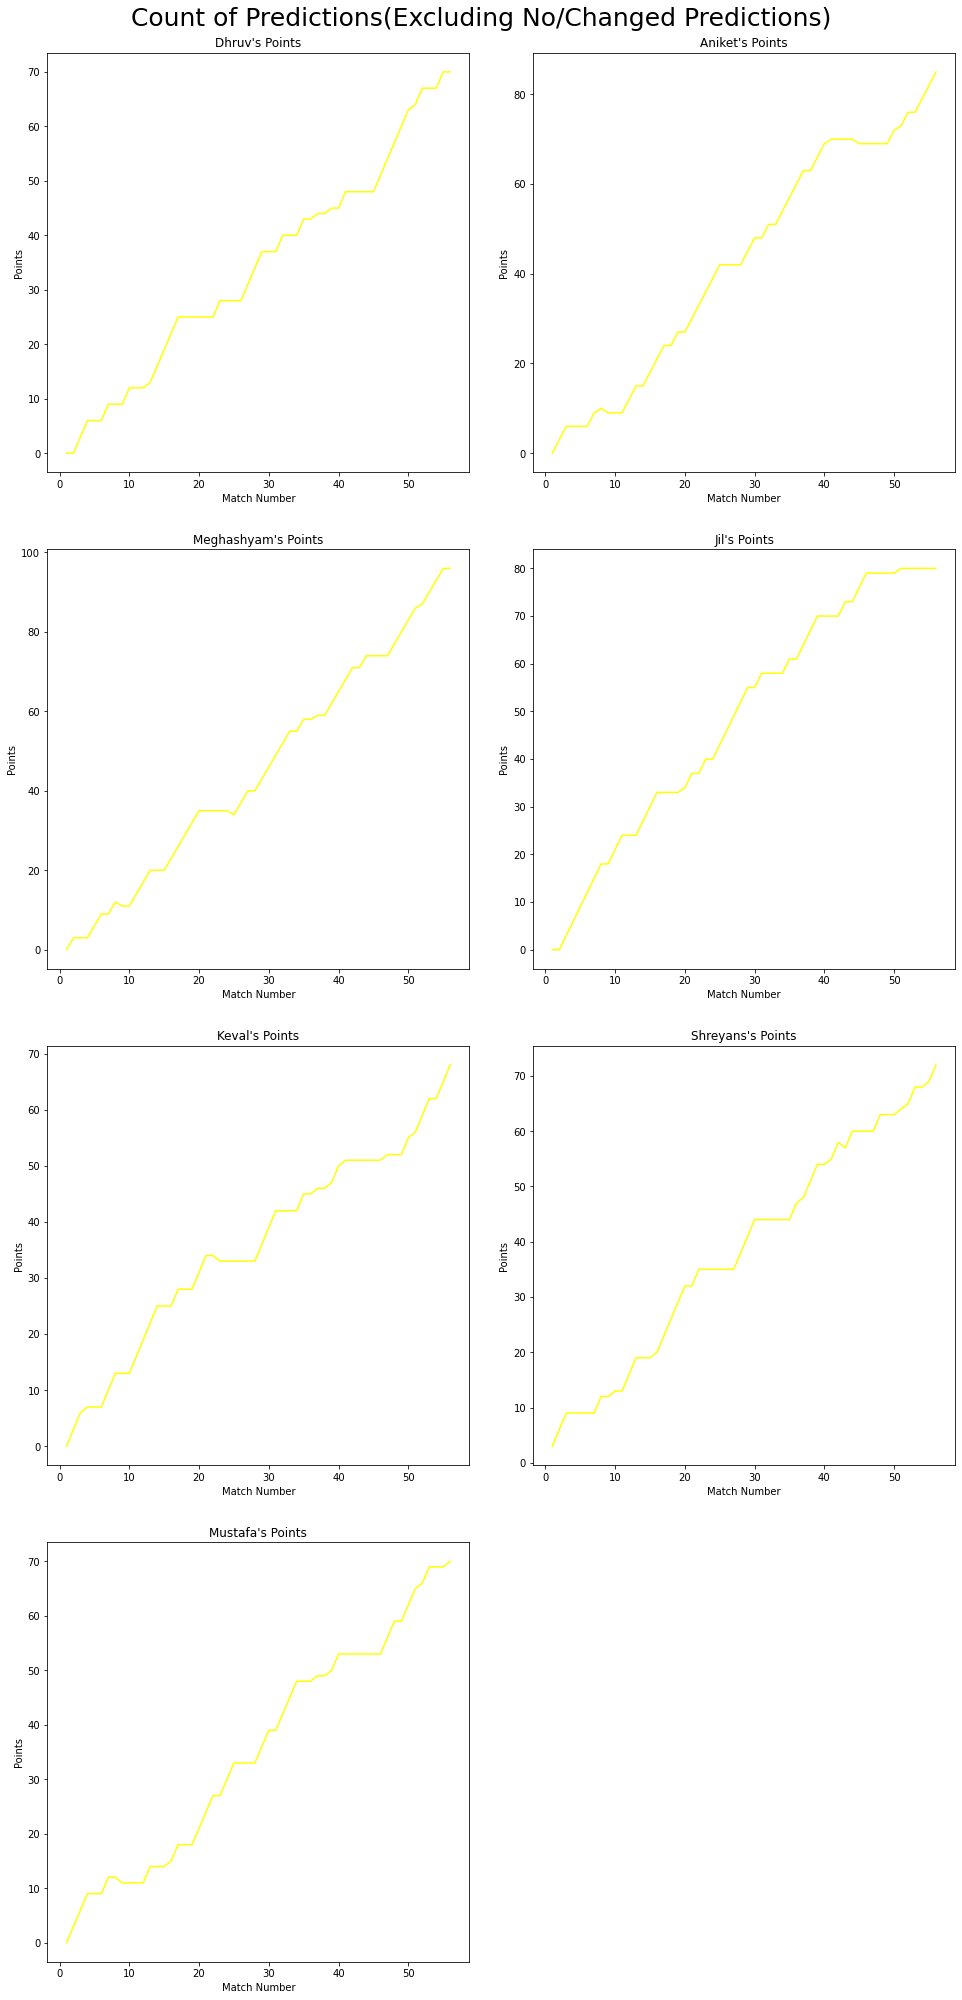

In [13]:
num_plots = len(pred)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows))
plt.suptitle('Count of Predictions(Excluding No/Changed Predictions)',fontsize = 25, y = 1.0)
fig.delaxes(axs[3][1])
number = np.arange(1,57)
for i, var in enumerate(l2):
    row = i//total_cols
    pos = i % total_cols
    ax = sns.lineplot(x = number, y = df[var],data = df, ax=axs[row][pos], palette= "Set1")
    ax.set(xlabel = 'Match Number', ylabel ='Points', title=names[i] + "'s Points")
plt.tight_layout(pad = 3.0)
plt.show()

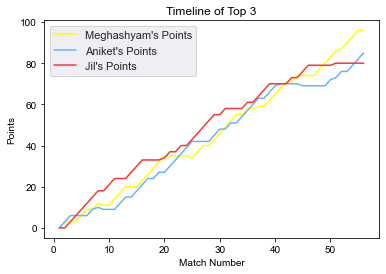

In [14]:
top3 = ['Meghashyam_CPoints', 'Aniket_CPoints', 'Jil_CPoints']
for i, var in enumerate(top3):
    ax = sns.lineplot(x = number, y = df[var],data = df, palette= "Set1")
    sns.set(rc={'figure.figsize':(15,15)})
    ax.set(xlabel = 'Match Number', ylabel ='Points', title = 'Timeline of Top 3')
plt.legend(["Meghashyam's Points", "Aniket's Points", "Jil's Points"])
plt.show()